In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

In [12]:
datos = pd.read_csv("train.csv", encoding="latin1")

<AxesSubplot: >

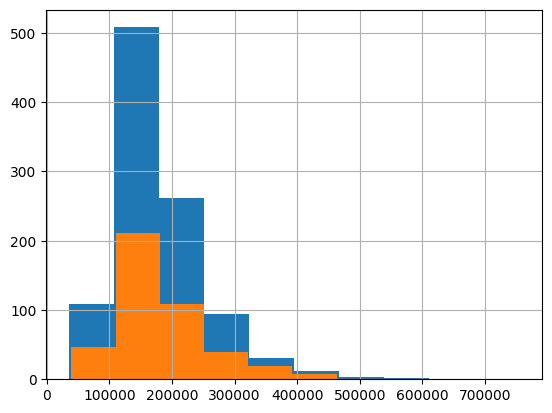

In [24]:
numericas = datos.select_dtypes(include='number')
X = numericas.drop("SalePrice", axis=1)
Y = numericas
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,train_size=0.7)
y_train["SalePrice"].hist()
y_test["SalePrice"].hist()


INCISO 5 
Esto calcula la matriz de correlación solo para las características de total_SF, age y SalePrice,LotArea ,OverallQual, YearRemodAdd, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, FullBat, GarageCars y ordenará las correlaciones por orden descendente con respecto a la columna SalePrice.
y para  la selección de las variables más importantes para predecir el precio de una casa están basas en su correlación con el precio.

In [8]:
corr_matrix = datos[['total_SF', 'age', 'LotArea', 'OverallQual', 'YearRemodAdd', 'TotalBsmtSF', 
                     '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'SalePrice']].corr()
corr_matrix["SalePrice"].sort_values(ascending=False)


SalePrice       1.000000
OverallQual     0.790982
total_SF        0.782260
GrLivArea       0.708624
GarageCars      0.640409
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearRemodAdd    0.507101
2ndFlrSF        0.319334
LotArea         0.263843
age            -0.522897
Name: SalePrice, dtype: float64

In [9]:
np.random.seed(42)
# Ingeniería de características
datos['total_SF'] = datos['1stFlrSF'] + datos['2ndFlrSF'] + datos['TotalBsmtSF']
datos['age'] = 2023 - datos['YearBuilt']
# Seleccionar variables importantes
variables = ['total_SF', 'age', 'LotArea', 'OverallQual', 'YearRemodAdd', 'TotalBsmtSF', 
             '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars']
X = datos[variables].values
y = datos['SalePrice'].values

# Separar en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Evaluar el modelo
score_train = modelo.score(X_train, y_train)
score_test = modelo.score(X_test, y_test)

print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)
print("R^2 en entrenamiento:", score_train)
print("R^2 en prueba:", score_test)

Coeficientes: [ 1.65531341e+01 -2.85351724e+02  6.36646096e-01  2.03291216e+04
  3.26898190e+02 -3.03180573e+00  1.59258827e+01  3.65905713e+00
  2.56096972e+01 -7.36197744e+03  5.87904201e+02  1.39762990e+04]
Intercepto: -699544.2480192141
R^2 en entrenamiento: 0.7715377573341753
R^2 en prueba: 0.7983537346670326


Coeficientes: [ 1.65531341e+01 -2.85351724e+02  6.36646096e-01  2.03291216e+04
  3.26898190e+02 -3.03180573e+00  1.59258827e+01  3.65905713e+00
  2.56096972e+01 -7.36197744e+03  5.87904201e+02  1.39762990e+04]
Intercepto: -699544.2480192141
R^2 en entrenamiento: 0.7715377573341753
R^2 en prueba: 0.7983537346670326


In [ ]:
regresion = LinearRegression()
regresion.fit(X_train, y_train)
y_pred = regresion.predict(X_test)